In [1]:
random_state = 42 # notebook consistency

from typing import List
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns
import os

from sklearn.pipeline import make_pipeline
from umap import UMAP
from sklearn.cluster import KMeans, AgglomerativeClustering, SpectralClustering, DBSCAN
from sklearn.mixture import GaussianMixture

## Load data
cwd = os.getcwd()
os.chdir('..')
from scripts.consensus_matrix import *
from scripts.utils import *
from scripts.check import *
df = pd.read_csv('BRCA_data.csv')

os.chdir(cwd)

sample_name = df.iloc[:,0].copy()    # sample index
X = df.iloc[:,1:354].copy()          # X : gene expression features
y = df.iloc[:,354:].copy()           # y : clinical labels

## Fit UMAP
umap_model = UMAP(
    n_neighbors=10,
    n_components=2,
    min_dist=0.1,
    metric="euclidean",
    random_state=random_state,
    n_jobs=1
)
X_umap = make_pipeline(umap_model).fit_transform(X)

## Peek

Peek at labels...

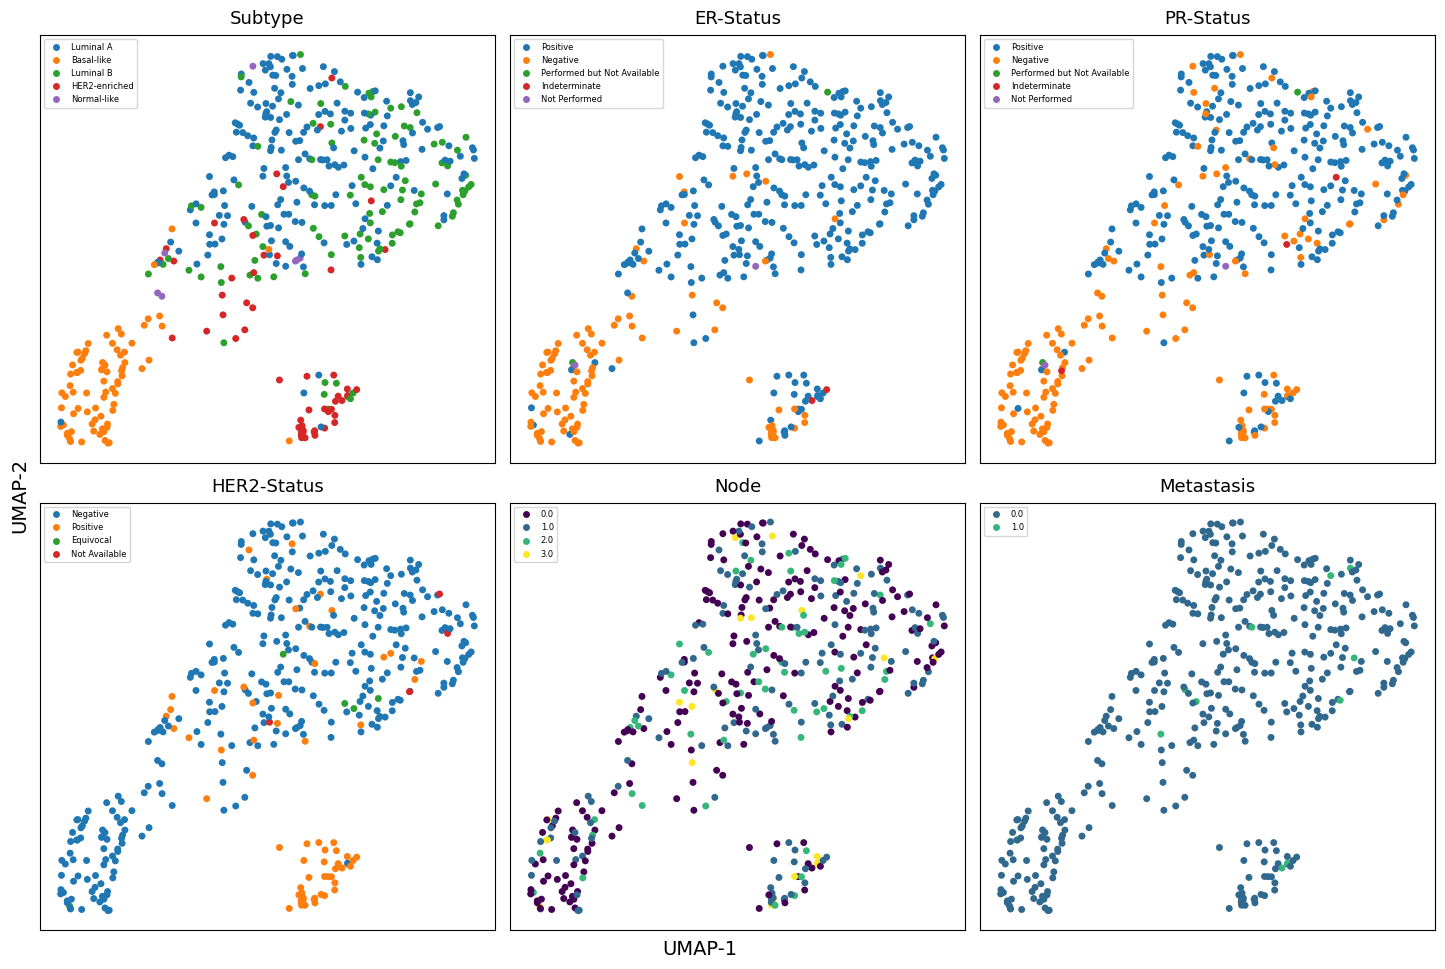

In [2]:
df_plot = pd.concat(
    [pd.DataFrame(X_umap, columns=['UMAP-1', 'UMAP-2']),
     y.reset_index(drop=True)], axis=1
)
label_cols = ['Subtype', 'ER-Status', 'PR-Status', 'HER2-Status', 'Node', 'Metastasis']

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()
for ax, col in zip(axes, label_cols):
    if df_plot[col].dtype == 'object':
        sns.scatterplot(
            data=df_plot, x='UMAP-1', y='UMAP-2',
            hue=col, palette='tab10', s=25, ax=ax, edgecolor='none', legend=True
        )
    else:
        sns.scatterplot(
            data=df_plot, x='UMAP-1', y='UMAP-2',
            hue=col, palette='viridis', s=25, ax=ax, edgecolor='none', legend=True
        )
    ax.set_title(col, fontsize=13, pad=8)
    ax.set_xticks([]); ax.set_yticks([])
    ax.set_xlabel(''); ax.set_ylabel('')
    ax.legend(loc='upper left', fontsize=6, markerscale=1, frameon=True)
fig.text(0.5, 0.04, 'UMAP-1', ha='center', fontsize=14)
fig.text(0.04, 0.5, 'UMAP-2', va='center', rotation='vertical', fontsize=14)
plt.tight_layout(rect=[0.05, 0.05, 1, 1])
plt.show()

Isolate by method

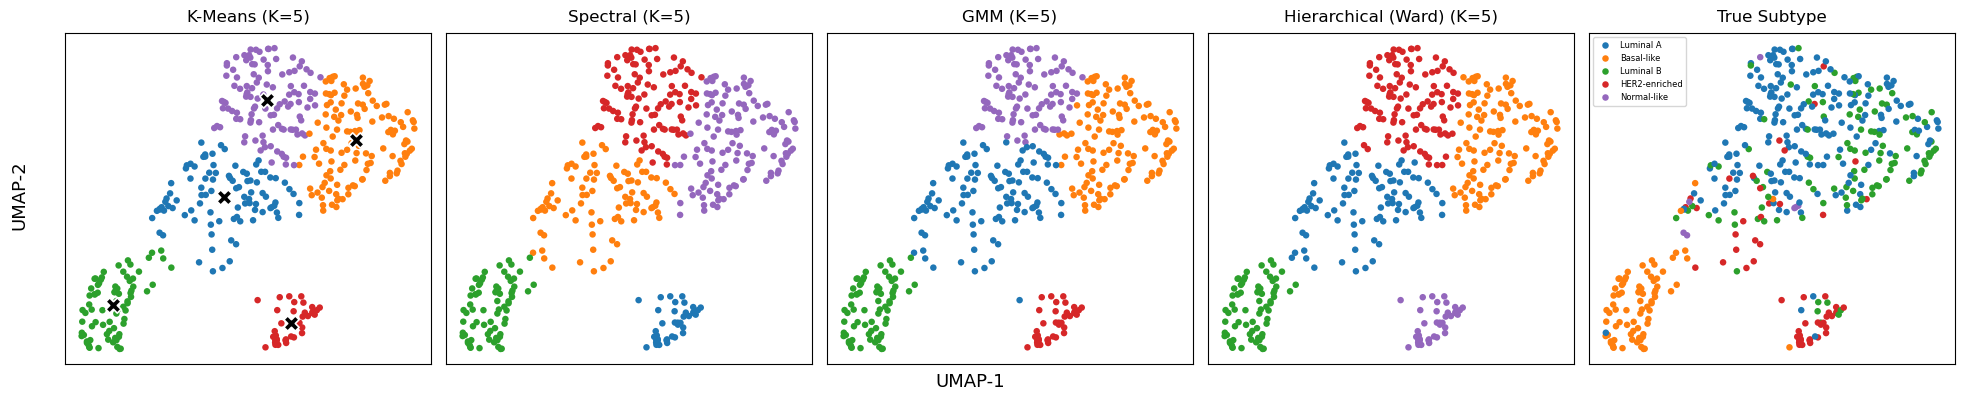

In [3]:
plot_all_clustering_methods(X_umap, df_plot, 'Subtype', n_clusters=5)

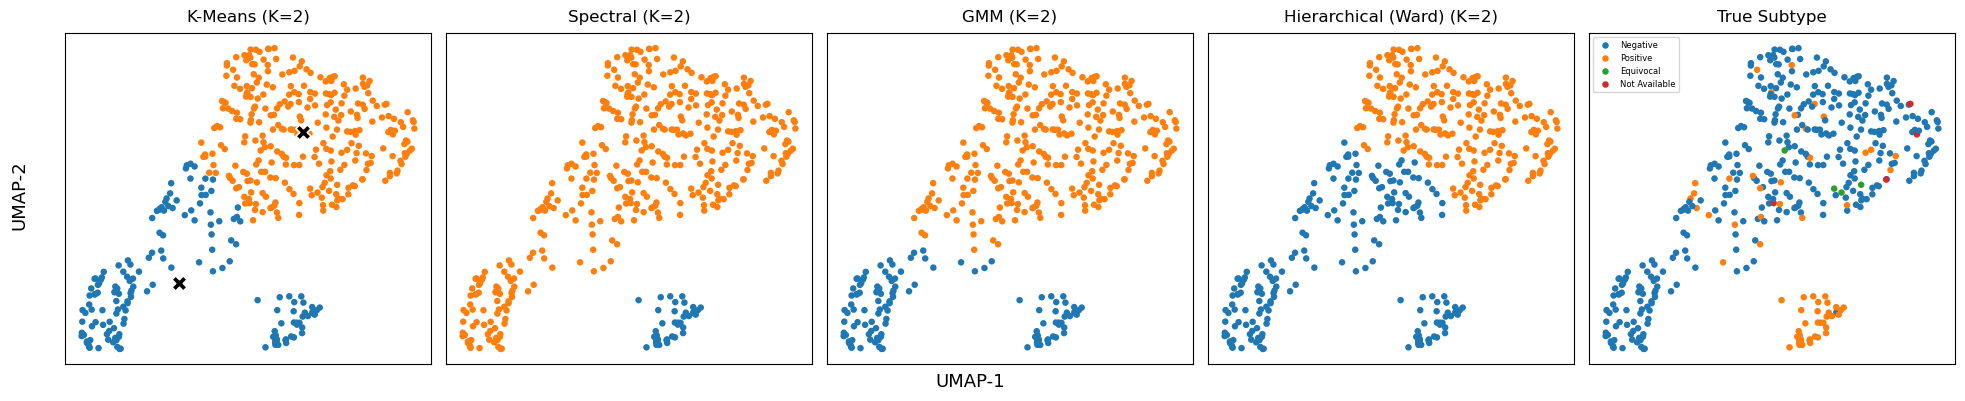

In [4]:
plot_all_clustering_methods(X_umap, df_plot, 'HER2-Status', n_clusters=2)

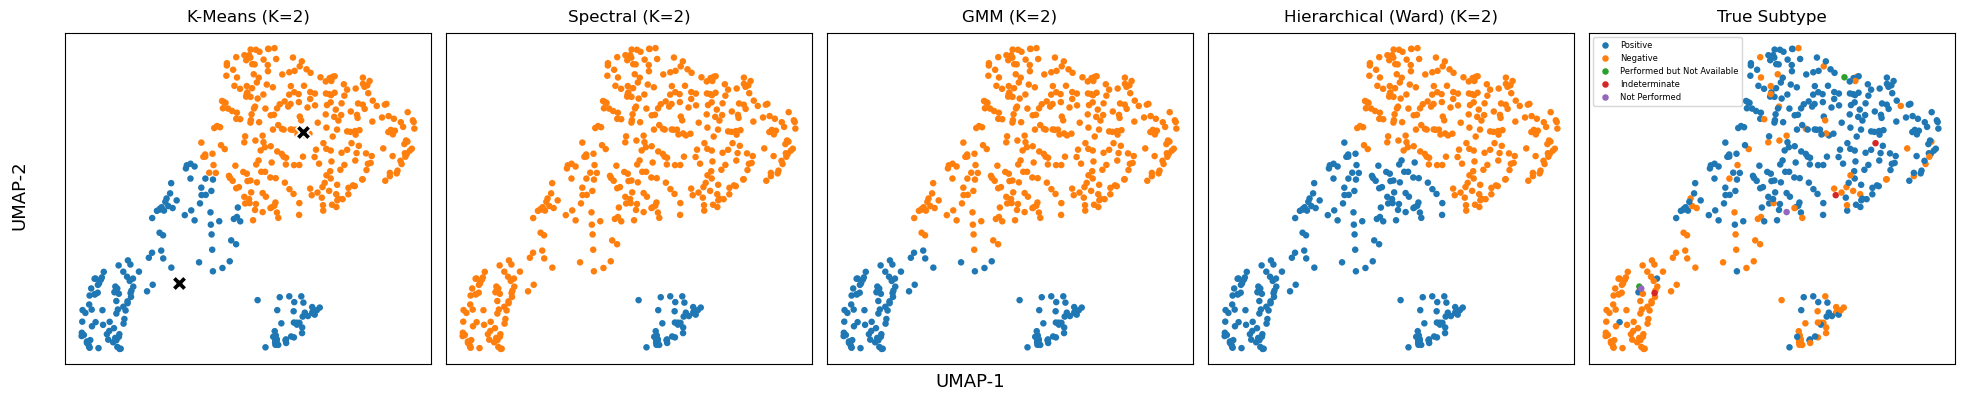

In [5]:
plot_all_clustering_methods(X_umap, df_plot, 'PR-Status', n_clusters=2)